In [2]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
from numpy import zeros_like
from IPython.display import display
def display_matrix(m):
    display(sympy.Matrix(m))
import sympy
import pandas as pd
import scipy.stats as ss

sympy.init_printing()

In [3]:
def merton_jump_paths_antithetic(S0, paths, lam, sigma, mu, v, m, T, I):
    np.random.seed(42)
    matrix = np.zeros((2 * paths, I))  # Twice the number of paths for antithetic paths
    for k in range(paths):
        X = np.zeros(I)
        X_anti = np.zeros(I)  # For antithetic path
        S = np.zeros(I)
        S_anti = np.zeros(I)  # For antithetic path
        
        S[0], S_anti[0] = S0, S0
        X[0], X_anti[0] = np.log(S0), np.log(S0)
        
        dt = T / I
    
        for i in range(1, I):
            Z = np.random.standard_normal()
            Z_anti = -Z
            N = np.random.poisson(lam * dt)
            Y = np.exp(np.random.normal(m, v, N))

            M = np.sum(np.log(Y)) if N > 0 else 0
            M_anti = -M  # Negating the jump component for antithetic path

            # Original path
            X[i] = X[i-1] + (mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * Z + M
            S[i] = np.exp(X[i])

            # Antithetic path
            X_anti[i] = X_anti[i-1] + (mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * Z_anti + M_anti
            S_anti[i] = np.exp(X_anti[i])

        matrix[k] = S
        matrix[paths + k] = S_anti  # Storing the antithetic path

    return matrix


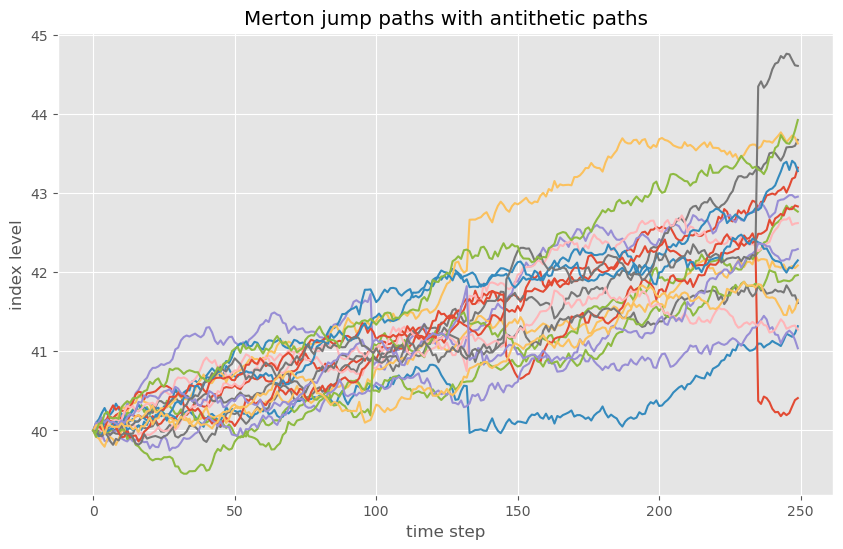

In [4]:
deg = 3
basis = 'legendre'
#initial price list
S0 = 40
K = 40

mu = 0.06
r = 0.06
T = 1
I = 250
paths = 10
m = 0

GBM_lam = 0
GBM_sigma = 0.04
GBM_mu = r
GBM_v = 0

LN_lam = 1
LN_sigma = 0.02
LN_mu = r
LN_v = 0.02

JR_lam = 0.01
JR_sigma = 0.03
JR_mu = r + JR_lam

df = np.exp(-mu*T)

# Generate the paths including antithetic paths
paths_with_antithetic = merton_jump_paths_antithetic(S0, paths, LN_lam, LN_sigma, LN_mu, LN_v, m, T, I)
paths_with_antithetic.shape  # Should be (2 * paths_example, I_example)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(paths_with_antithetic.T)
ax.set_xlabel('time step')
ax.set_ylabel('index level')
ax.set_title('Merton jump paths with antithetic paths')
plt.show()